(100, 3)
[1 1 0 1 1 0 2 0 0 1 1 2 2 1 0 0 0 2 0 2 1 1 1 0 2 2 1 0 1 0 0 2 2 0 0 1 0
 1 2 2 2 1 2 1 1 0 2 0 2 0 2 2 0 0 1 2 1 0 0 2 1 2 0 1 0 1 2 0 1 2 2 0 0 0
 2 1 1 1 0 2 1 2 1 1 1 0 0 2 2 2 0 0 1 1 2 0 2 2 2 1]


ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

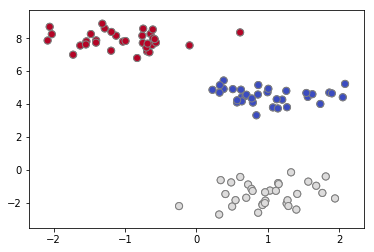

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=100,  centers=3, n_features=3,#features-кол-во линий
            #точки, кол-во центров(локаций), кол-во признаков
                 random_state=0, cluster_std=0.60)
                                #стандартное отклонение кластера
print(X.shape)#кол-во элементов признаков
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm');
            #вывод 2-х признаков, разные цвета, обводка, размер точкиб
print(y)

clf = SVC(kernel='linear', C=1E10)
clf.fit(X,y)


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()#возврать Axesa
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T#ravel - равномерный массив
    #print(X.ravel(),Y.ravel()) # сливает массив в один непрерывный
    #print(xy)
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
        #выделение опорных векторов
        #ax.scatter(model.support_vectors_[:, 0],
                   #model.support_vectors_[:, 1],
                   #s= 300, linewidth=2, edgecolor='green',
                   #facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim
    #ax.set_ylim(ylim)

plt.scatter(X[:,0], X[:, 1], c=y, edgecolor="grey", s=50, cmap='coolwarm')
plot_svc_decision_function(clf);